<h1><center>Car Accident Severity</center></h1>

<h4>About this Notebook</h4>
In this notebook,I have implemented IBM Data Science capstone project on Car Accident Severity, dealing with predicting severity of accident based on addresstype(intersection,alley,block),collisiontype,junctiontype,weather,light and road condition. So based on which my target field is Severity code and features are Addrtype,Collisiontype,Junctiontype,Weathercond,Lightcond and Roadcond.

<h3>Approach</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_understanding">Data Undersdtanding</a></li>
        <li><a href="#data_exploration">Exploratory Data Analysis</a></li>
        <li><a href="#predictivemodeling">Predictive Model Development and Evaluation</a></li>
        <li><a href="#knn">K nearest neighbor (KNN</a></li>
        <li><a href="#decisiotree">Decision Tree</a></li>
        <li><a href="#logistic">Logistic Regression</a></li>
    </ol>
</div>
<br>
<hr>


In [111]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline


<h2 id="data_understanding">Data Understanding</h2>

In [112]:

#downloading dataset - it takes few seconds to run
!wget -nv -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
#read the data    
df = pd.read_csv("Data-Collisions.csv")
df.head(10)

2020-09-16 22:18:47 URL:https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv [73917638/73917638] -> "Data-Collisions.csv" [1]


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [113]:
#shape of the data
df.shape

(194673, 38)

In [114]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

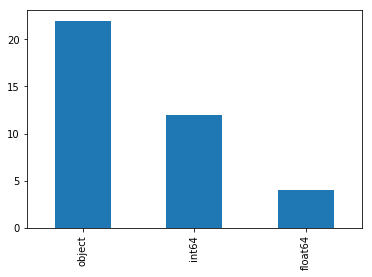

In [115]:
df.dtypes.value_counts().plot(kind='bar')

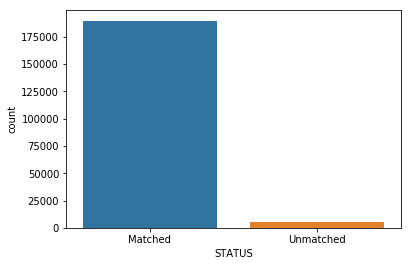

In [116]:
sns.countplot(df['STATUS'], data=df)

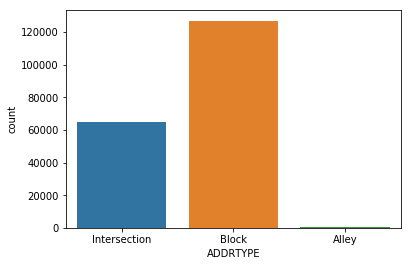

In [117]:
sns.countplot(df['ADDRTYPE'], data=df)

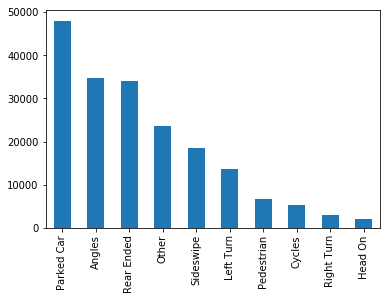

In [118]:
df.COLLISIONTYPE.value_counts().plot(kind='bar')

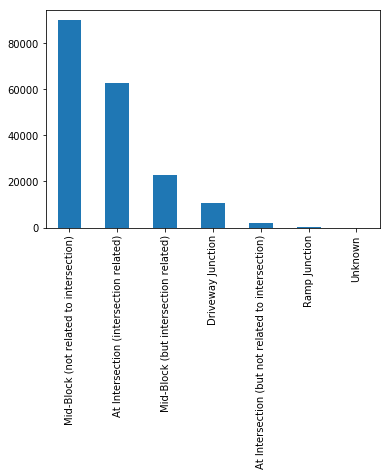

In [119]:
df.JUNCTIONTYPE.value_counts().plot(kind='bar')

In [120]:
#dropping irrelevent columns

df = df.drop(['X', 'Y', 'COLDETKEY', 'REPORTNO', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'INCDATE',
       'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)
df.head(5)

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1,1307,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,2,52200,Matched,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,3,26700,Matched,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,4,1144,Matched,Block,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,5,17700,Matched,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight


#### Missing values

In [121]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE        0
OBJECTID            0
INCKEY              0
STATUS              0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
dtype: int64

In [122]:
#replace missing values with 'Others'
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')


df['COLLISIONTYPE'] = df['COLLISIONTYPE'].fillna(0)
df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

In [123]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE     0
OBJECTID         0
INCKEY           0
STATUS           0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

In [124]:
#Finding duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


### Encoding the data - Conversion of catagorical variables to numerical values

Features in this dataset are categorical WEATHER,ROADCOND,LIGHTCOND, Sklearn KNN,Decision Trees,Logistic models do not handle categorical variables. But still we can convert these features to numerical values.

In [125]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

status = preprocessing.LabelEncoder()
status.fit(['Unmatched','Matched'])
df['STATUS'] = status.transform(df['STATUS'])

coll = preprocessing.LabelEncoder()
coll.fit(df['COLLISIONTYPE'])
df['COLLISIONTYPE'] = coll.transform(df['COLLISIONTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

In [126]:
df.head()

,SEVERITYCODE,OBJECTID,INCKEY,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1,1307,0,2,0,2,0,0,2,1,4,8,5
1,1,2,52200,0,1,9,2,0,0,2,4,6,8,2
2,1,3,26700,0,1,5,4,0,0,3,4,4,0,5
3,1,4,1144,0,1,4,3,0,0,3,4,1,0,5
4,2,5,17700,0,2,0,2,0,0,2,1,6,8,5


In [127]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

### Exploratory Data Analysis

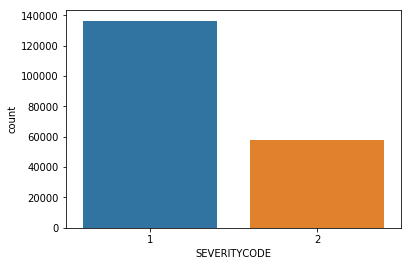

In [128]:
sns.countplot(df['SEVERITYCODE'], data=df)

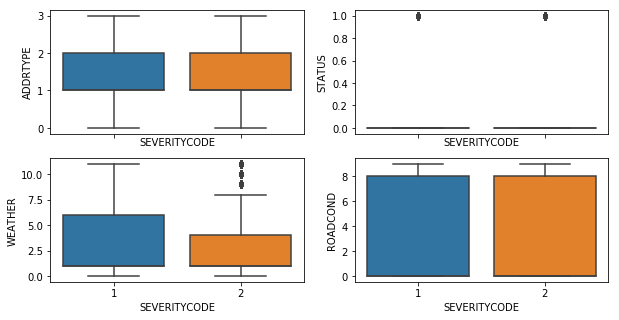

In [129]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))
sns.boxplot(ax=axes[0, 0], data=df, x='SEVERITYCODE', y='ADDRTYPE')
sns.boxplot(ax=axes[0, 1], data=df, x='SEVERITYCODE', y='STATUS')
sns.boxplot(ax=axes[1, 0], data=df, x='SEVERITYCODE', y='WEATHER')
sns.boxplot(ax=axes[1, 1], data=df, x='SEVERITYCODE', y='ROADCOND')

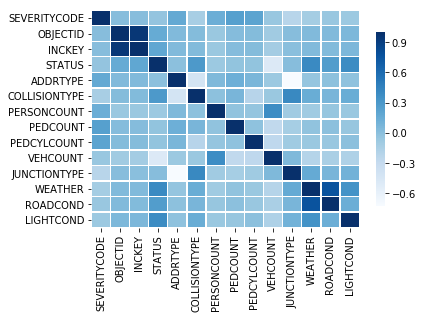

In [130]:
sns.heatmap(df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})

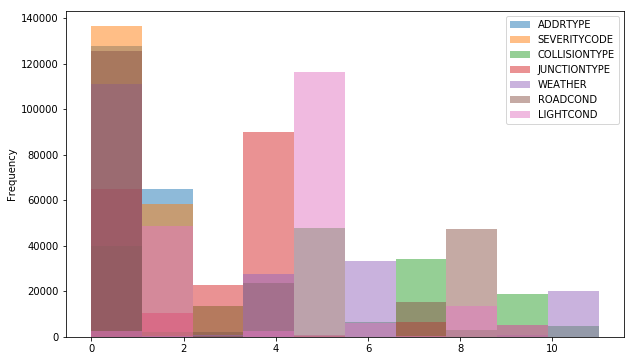

In [131]:
df[['ADDRTYPE', 'SEVERITYCODE','COLLISIONTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].plot(kind='hist', figsize=(10,6), alpha=0.5, stacked=False)

## Predictive Model Development & Evaluation

In [132]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

**Train Test Split**

In [133]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 13) (155738,)
Test set: (38935, 13) (38935,)


In [134]:
#split the data

X = df[['OBJECTID','INCKEY','STATUS','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [135]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(155738, 13)
(155738,)

Test set size
(38935, 13)
(38935,)


### K nearest neighbor (KNN)

**Train model and Predict for K values from 1 to 25** 

In [136]:
#it takes few seconds to run
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model using Training data set
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #Prediction using Test data set
    yhat=neigh.predict(X_test)
    #Finding accuracy of the model comparing actual and predicted values from test dataset
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.59196096, 0.66955182, 0.62211378, 0.67194041, 0.64124823,
       0.67769359, 0.65319122, 0.68103249, 0.66477462, 0.6865802 ,
       0.67358418, 0.68801849, 0.67915757, 0.69053551, 0.68370361,
       0.69382304, 0.68678567, 0.69590343, 0.69084371, 0.69672531,
       0.69199949, 0.69754719, 0.6937203 , 0.69824066])

**Plot model accuracy for Different number of Neighbors**

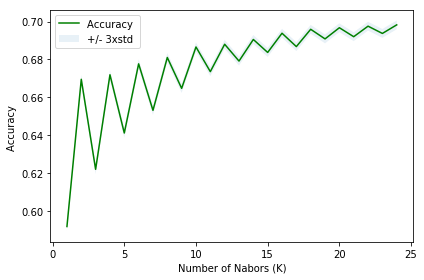

In [137]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [138]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6982406575060999 with k= 24


### Decision Tree

**Model development** 

In [139]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Train model using Training data set**

In [140]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prediction using Test data set**

In [141]:
predTree = drugTree.predict(X_test)

In [142]:
print (predTree [0:5])
print (y_test [0:5])

[1 2 1 1 1]
94063     1
137563    2
78237     1
105763    1
138711    1
Name: SEVERITYCODE, dtype: int64


**Model Evaluation- Finding accuracy of the model**

In [143]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Evaluating accuracy of the model using actual and predicted values of test dataset
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7506613586747143


## Logistic Regression

**Model development**

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Training model using training data set
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:
#Predicting values using test dataset
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [146]:
#predicting probability of 1 or 0 using test data set
yhat_prob = LR.predict_proba(X_test) #predict_probability
yhat_prob

array([[0.64728669, 0.35271331],
       [0.70978482, 0.29021518],
       [0.62311537, 0.37688463],
       ...,
       [0.57029221, 0.42970779],
       [0.70313673, 0.29686327],
       [0.69257338, 0.30742662]])

**Model Evaluation- Finding accuracy of the model**

In [147]:
#Evaluating accuracy of the model using actual and predicted values of test dataset
print('Score:',accuracy_score(yhat, y_test))
print('F1-Score:',f1_score(yhat, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, yhat))
print('')
print('Classification Report:')
print (classification_report(y_test, yhat))

Score: 0.6984718119943496
F1-Score: 0.8216997752262925

Confusion Martix:
[[27052   307]
 [11433   143]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.99      0.82     27359
           2       0.32      0.01      0.02     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.51      0.50      0.42     38935
weighted avg       0.59      0.70      0.58     38935



**log loss**

In [148]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6328053919861021

| Model         | Accuracy |
| ------------- |:---------|
| KNN           | 0.69     |
| Decision Tree | 0.75     |  
| Logistic      | 0.69     |    

## Conclusion

I have got a decent accuracy value for all classification algorithms. the best classifier of this problem is Decision Tree for it's best score compared to KNN and Logistic models.
Accidents often result in injury, disability, death, and property damage as well as financial costs to both society and the individuals involved.
most important predicting accidents due to weather, visibility and road conditions, Addresstype of accident, junctiontype.
These can be prevented by revealing hidden patterns in the data and announcing warning to the local government. Police and drivers on the targeted roads.